# ◼영화 관람객 수 예측

## ◾개요

- 2011~2019년 영화 데이터를 이용해 영화 관람객 수 예측 모델 구현
- 해당 모델을 2020년 영화에 적용하여 코로나19의 영향이 없었을 경우 관람객 수 예측
- 해당 결과를 바탕으로 2020년의 영화들에 끼친 코로나19의 영향을 확인해보려한다.

---

## ◾데이터 소개

In [475]:
import pandas as pd
import numpy as np

#### 영화 데이터

- KOBIS 공식 통계 : https://www.kobis.or.kr/kobis/business/stat/offc/searchOfficHitTotList.do?searchMode=year
- 한국영화연감(1971~2010) 통계를 기준으로 정리한 것이며, 2011년부터는 통합전산망을 기준으로 일정한 주기(매월, 매년)로 마감처리하여 산출되는 통계정보
  - 통합전산망을 사용한 `2011년~2020년 데이터`를 사용한다.
- 컬럼 정보
  - 순번 : 인덱스, 수치형
  - 영화명 : 영화명, 범주형
  - 감독 : 감독명, 범주형(다수일 경우 ', '로 구분)
  - 제작사 : 제작사명, 범주형(다수일 경우 ', '로 구분)
  - 수입사 : 수입사명, 범주형(다수일 경우 ', '로 구분)
  - 배급사 : 배급사명, 범주형(다수일 경우 ', '로 구분)
  - 개봉일 : 개봉일, 날짜형('YYYY-MM-DD')
  - 영화유형 : 영화 유형, 범주형
  - 영화형태 : 영화 형태, 범주형('장편', '단편', '옴니버스')
  - 국적 : 영화 제작 국가, 범주형
  - 전국스크린수 : 개봉 첫 주 최대 스크린 수, 수치형
  - 전국매출액 : 전국 매출액, 수치형
  - 전국관객수 : 전국 관객수, 수치형
  - 서울매출액 : 서울 매출액, 수치형
  - 서울관객수 : 서울 관객수, 수치형
  - 장르 : 대표 장르, 범주형
    - 21개의 유형(<a href = 'https://www.kobis.or.kr/kobis/business/stat/online/onlineGenreStat.do?CSRFToken=yOhFhXI1uvJrdJ_SERa8YxZhVjS9tKCERgIId5CsBXA&loadEnd=0&searchType=search&sSearchYearFrom=2021&sSearchMonthFrom=02&sSearchYearTo=2021&sSearchMonthTo=08' target='_blink'>KOBIS 장르별 통계 기준</a>)
    - SF, 가족, 공연, 공포(호러), 기타, 다큐멘터리, 드라마, 멜로/로맨스, 뮤지컬, 미스터리, 범죄, 사극, 서부극(웨스턴), 성인물(에로) ,스릴러, 애니메이션, 액션, 어드벤처, 전쟁, 코미디, 판타지
  - 등급 : 영화 시청 등급, 범주형
  - 영화구분 : 영화 구분, 범주형('일반 영화', '독립/예술영화')


In [476]:
movie = pd.read_excel('../data/전체영화데이터.xls', index_col=0)
movie.head(3)

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,장르,등급,영화구분
순번,,,,,,,,,,,,,,,,,
1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,1587,135748398910,17613682,3.312123e+10,4163666,사극,15세이상관람가,일반영화
2,극한직업,이병헌,"(주)어바웃필름,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,1978,139647979516,16264944,3.185866e+10,3638287,코미디,15세이상관람가,일반영화
3,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",NaN,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,개봉영화,장편,한국,1912,115698654137,14410754,2.753083e+10,3346172,판타지,12세이상관람가,일반영화


#### 네이버 영화 데이터

- 네이버 영화 검색 결과
- 컬럼 정보
  - 순번 : 인덱스, 수치형
  - 영화명 : 영화명, 범주형
  - 주연배우 : 주연배우, 범주형(복수의 경우 콤마(,)로 구분)
  - 평점 : 영화 평균 평점, 수치형
  - 평가자수 : 영화 평점 평가자 수, 수치형
  - 상영시간 : 영화 상영 시간, 수치형

In [477]:
naver_movie = pd.read_excel('../data/네이버_영화_데이터.xlsx', index_col=0)
naver_movie.head(3)

,영화명,감독,주연배우,평점,평가자수,상영시간
0,33,패트리시아 리건,"['안토니오 반데라스', ' 로드리고 산토로', ' 줄리엣 비노쉬']",8.56,241,126
1,800,관후,"['어우 하오', ' 두순', ' 장유호', ' 당예흔', ' 강무', ' 야오천'...",3.40,693,149
2,1917,샘 멘데스,"['조지 맥케이', ' 딘-찰스 채프먼']",8.89,6279,119


#### 역대 박스 오피스 정보

- KOBIS 공식 통계 : https://www.kobis.or.kr/kobis/business/stat/offc/searchOfficHitTotList.do?searchMode=year
- 한국영화연감(1971~2010) 통계를 기준으로 정리한 것이며, 2011년부터는 통합전산망을 기준으로 일정한 주기(매월, 매년)로 마감처리하여 산출되는 통계정보
- 전체 데이터 중 전국 관객수 기준 Top 300 데이터 사용
- 컬럼 정보
  - 순번 : 인덱스, 수치형
  - 영화명 : 영화명, 범주형
  - 감독 : 감독명, 범주형(다수일 경우 ', '로 구분)
  - 국적 : 영화 제작 국가, 범주형
  - 전국관객수 : 전국 관객수, 수치형
  - 개봉년도 : 개봉년도, 날짜형(년도만 표현)
  - 개봉일 : 개봉일, 날짜형('YYYY-MM-DD')
  - 배우 : 출연 배우 목록, 범주형(['배우1', '배우2', ...]의 형태로 표현)
  - 배급사 : 배급사명, 범주형(다수일 경우 ', '로 구분)


In [478]:
ranking = pd.read_excel('../data/역대박스오피스Top300.xls', index_col=0)
ranking.head(2)

,영화명,감독,국적,전국관객수,개봉일,개봉년도,배우,배급사
순번,,,,,,,,
1,명량,김한민,한국,17613682,2014-07-30,2014,"['최민식', '류승룡', '조진웅']",(주)씨제이이엔엠
2,극한직업,이병헌,한국,16264944,2019-01-23,2019,"['류승룡', '이하늬', '진선규', '이동휘', '공명']",(주)씨제이이엔엠


---

## ◾데이터 정리

In [479]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import set_matplotlib_korean
import warnings
warnings.filterwarnings(action='ignore')

### 1. 영화 데이터

#### 영화 데이터 결측치

- 2011 ~ 2020년 총 13308개의 데이터
- 결측치가 있는 컬럼을 확인하여 결측치를 확인해본다.

In [480]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13308 entries, 1 to 13308
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     13308 non-null  object        
 1   감독      12619 non-null  object        
 2   제작사     3941 non-null   object        
 3   수입사     9095 non-null   object        
 4   배급사     13292 non-null  object        
 5   개봉일     13308 non-null  datetime64[ns]
 6   영화유형    13308 non-null  object        
 7   영화형태    13307 non-null  object        
 8   국적      13308 non-null  object        
 9   전국스크린수  13308 non-null  int64         
 10  전국매출액   13308 non-null  int64         
 11  전국관객수   13308 non-null  int64         
 12  서울매출액   13302 non-null  float64       
 13  서울관객수   13308 non-null  int64         
 14  장르      13238 non-null  object        
 15  등급      13308 non-null  object        
 16  영화구분    13308 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object

- 제작사, 수입사, 배급사 결측치
  - 제작사, 수입사의 경우 결측치가 많으므로 배급사를 대표값으로 사용한다.
  - 제작사, 수입사 컬럼은 삭제한다.
- 감독, 장르, 영화 형태의 결측치는 '기타'로 대체한다.
- 서울매출액, 서울관객수 컬럼은 삭제한다.

In [481]:
movie.isnull().sum()

영화명          0
감독         689
제작사       9367
수입사       4213
배급사         16
개봉일          0
영화유형         0
영화형태         1
국적           0
전국스크린수       0
전국매출액        0
전국관객수        0
서울매출액        6
서울관객수        0
장르          70
등급           0
영화구분         0
dtype: int64

In [482]:
# 결측치 처리
movie = movie.drop(['제작사', '수입사'], axis=1)
movie = movie.drop(['서울매출액', '서울관객수'], axis=1)
movie['감독'].fillna('기타', inplace=True)
movie['장르'].fillna('기타', inplace=True)
movie['배급사'].fillna('기타', inplace=True)
movie['영화형태'].fillna('기타', inplace=True)

In [483]:
movie.isnull().sum()

영화명       0
감독        0
배급사       0
개봉일       0
영화유형      0
영화형태      0
국적        0
전국스크린수    0
전국매출액     0
전국관객수     0
장르        0
등급        0
영화구분      0
dtype: int64

In [484]:
# 데이터 임시 저장
# movie.to_excel('../data/전체영화데이터_1_fillna.xls', encoding='utf-8')
# xlwt의 유지보수가 끝나 사용이 종료된다고 한다. 으악

# import openpyxl
# openpyxl 사용 코드 예시를 첨부한다.
# writer = pd.ExcelWriter("../data/test.xls", engine='openpyxl', date_format='YYYY-MM-DD')
# movie.to_excel(writer)
# writer.close()

#### 영화 데이터 범주형 확인

- 데이터 유형
  - 날짜형(1개) : 개봉일('YYYY-MM-DD')
  - 수치형(3개) : 전국스크린수, 전국매출액, 전국관객수
  - 범주형(8개) : 영화명, 감독, 영화유형, 영화형태, 국적, 장르, 등급, 영화구분
- 범주형 데이터 중복 확인한 결과 영화명을 제외하고 중복값이 많은 것을 볼 수 있다.
- 각 범주형을 살펴보며 데이터 정리를 진행한다.

In [485]:
category_cols = ['영화명','감독', '배급사', '영화유형','영화형태','국적','장르','등급','영화구분',]

# 범주형 데이터의 unique 확인
for col in category_cols:
    print('컬럼 [{}] UNIQUE : {}'.format(col, len(movie[col].unique())))

컬럼 [영화명] UNIQUE : 13116
컬럼 [감독] UNIQUE : 6131
컬럼 [배급사] UNIQUE : 905
컬럼 [영화유형] UNIQUE : 1
컬럼 [영화형태] UNIQUE : 4
컬럼 [국적] UNIQUE : 68
컬럼 [장르] UNIQUE : 21
컬럼 [등급] UNIQUE : 10
컬럼 [영화구분] UNIQUE : 2


##### 1. 감독

- 감독 데이터
  - 다수의 감독이 있는 경우 콤마(,)로 구분되어 있다.
  - 다수의 감독을 분리하여 1명의 대표감독으로 변경해준다.
    - ','를 기준으로 분리 오름차순 정렬 후 첫 번째 감독을 사용
    - `'안소니 루소,조 루소'`-`'조 루소, 안소니 루소'`와 같은 형태가 존재하기에 정렬을 진행한다.

In [486]:
movie['감독'].unique()

array(['김한민', '이병헌', '김용화', ..., '오카다 히로', '허재형', '레 탄 선'], dtype=object)

In [487]:
# 다수의 감독 데이터 변경
for idx, row in movie.iterrows():
    if ',' in row['감독']:
        directors = row['감독'].split(',')
        # 양 끝 공백 제거 후 정렬
        directors.sort(key=lambda x : x.strip())
        movie['감독'][idx] = directors[0].strip()

- 대표 감독 선정으로 5987 개로 정리되었다.

In [488]:
len(movie['감독'].unique()), movie['감독'].unique()

(5987,
 array(['김한민', '이병헌', '김용화', ..., '오카다 히로', '허재형', '레 탄 선'], dtype=object))

##### 2. 배급사

- 배급사 데이터
  - 다수의 배급사가 있는 경우 콤마(,)로 구분되어 있다.
  - 다수의 배급사를 분리하여 1개의 대표배급사로 변경해준다.
    - 가장 처음 나오는 배급사 이름이 가장 중요하다고 판단하여 해당 배급사를 대표배급사로 결정한다.

In [489]:
movie['배급사'].unique()

array(['(주)씨제이이엔엠', '롯데쇼핑㈜롯데엔터테인먼트', '월트디즈니컴퍼니코리아 유한책임회사', '(주)쇼박스',
       '(주)넥스트엔터테인먼트월드(NEW)', '롯데컬처웍스(주)롯데엔터테인먼트',
       '월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)', '소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)',
       '워너브러더스 코리아(주)', '월트디즈니컴퍼니코리아 유한책임회사,이십세기폭스코리아(주)',
       '월트디즈니컴퍼니코리아(주)', '(주)씨제이이엔엠,(주)덱스터스튜디오',
       '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점',
       '월트디즈니컴퍼니코리아 유한책임회사,한국소니픽쳐스릴리징브에나비스타영화㈜', '이십세기폭스코리아(주)',
       '메가박스중앙(주)플러스엠,(주)키위미디어그룹', '유니버설픽쳐스인터내셔널 코리아(유)',
       '한국소니픽쳐스릴리징브에나비스타영화㈜', 'CGV아트하우스,(주)대명문화공장',
       '롯데쇼핑㈜롯데엔터테인먼트,(주)싸이더스', '메가박스중앙(주)플러스엠', '판씨네마(주)', '(주)와우픽쳐스',
       '(주)에이스메이커무비웍스,(주)키위미디어그룹', '롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스',
       '(주)스튜디오디에이치엘,주식회사 해리슨앤컴퍼니,워너브러더스 코리아(주)', '아이러브시네마',
       '(주)인벤트스톤,영화사청어람(주)', '(주)에이스메이커무비웍스', '필라멘트픽쳐스',
       '오퍼스픽쳐스(유),CGV아트하우스', '에스케이플래닛(주),(주)씨제이이엔엠', '씨네그루(주)다우기술',
       '(주)메리크리스마스,TCO(주)더콘텐츠온', 'CJ ENM', 'CGV아트하우스,영화사 풀',
       '(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온', '씨너스엔터테인먼트(주),타임스토리그룹(주)',
       '(주)영화사 그램,이십세기폭스코리아(주)', 'CGV아트하우스', '주

In [490]:
# 다수의 배급사 데이터 변경
for idx, row in movie.iterrows():
    if ',' in row['배급사']:
        distributor = row['배급사'].split(',')
        # 양 끝 공백 제거 후 변경
        movie['배급사'][idx] = distributor[0].strip()

- 대표 배급사 선정으로 300개가 줄어 606개가 되었다.
- 확인한 결과 디즈니, 소니픽쳐스, CGV, 롯데, 메가박스 5개의 경우 반복되는 경우가 있다.
  - 이러한 경우는 동일한 것으로 보고 ['디즈니', '소니픽쳐스', 'CGV', '롯데', '메가박스']로 변경해준다.

In [491]:
print(len(movie['배급사'].unique()))

606


##### 3. 영화 유형

- 영화유형 데이터
  - 1개의 유형만 가지고 있으므로 해당 컬럼은 삭제한다.

In [492]:
movie['영화유형'].unique()

array(['개봉영화'], dtype=object)

In [493]:
movie.drop('영화유형', axis=1, inplace=True)

In [494]:
movie.columns

Index(['영화명', '감독', '배급사', '개봉일', '영화형태', '국적', '전국스크린수', '전국매출액', '전국관객수',
       '장르', '등급', '영화구분'],
      dtype='object')

##### 4. 영화형태

- 영화형태 데이터
  - 4개의 유형을 가진 데이터로 이상한 값은 없으므로 넘어간다.
  - 장편이 압도적으로 많은 것을 볼 수 있다.

In [495]:
movie['영화형태'].unique()

array(['장편', '옴니버스', '단편', '기타'], dtype=object)

In [496]:
movie['영화형태'].value_counts()

장편      13262
옴니버스       44
단편          1
기타          1
Name: 영화형태, dtype: int64

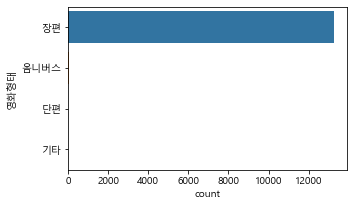

In [497]:
ordered_index = movie['영화형태'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(5, 3))
sns.countplot(data = movie, y = '영화형태', order=ordered_index)
plt.show()

##### 5. 국적

- 국적 데이터
  - 총 68개의 유형이 있다.

In [498]:
len(movie['국적'].unique()), movie['국적'].unique()

(68,
 array(['한국', '미국', '일본', '영국', '프랑스', '벨기에', '아이슬란드', '독일', '스페인', '러시아',
        '아일랜드', '남아프리카공화국', '인도', '대만', '핀란드', '중국', '스웨덴', '이탈리아', '호주',
        '덴마크', '캐나다', '기타', '아르헨티나', '홍콩', '페루', '태국', '우크라이나', '노르웨이',
        '오스트리아', '터키', '멕시코', '뉴질랜드', '체코', '그리스', '폴란드', '칠레', '헝가리',
        '말레이시아', '인도네시아', '브라질', '네덜란드', '이스라엘', '이란', '싱가포르', '루마니아',
        '포르투갈', '스위스', '팔레스타인', '콜롬비아', '에스토니아', '아랍에미리트연합국정부', '베트남',
        '몽고', '불가리아', '부탄', '슬로바키아', '쿠바', '크로아티아', '베네수엘라', '카자흐스탄',
        '우루과이', '몰타', '필리핀', '세르비아', '이라크', '마케도니아', '모로코', '우즈베키스탄'],
       dtype=object))

In [499]:
movie['국적'].value_counts().sort_values(ascending=False)[:10]

한국     3954
일본     3912
미국     2668
프랑스     436
영국      424
중국      340
독일      224
캐나다     172
스페인     131
홍콩      130
Name: 국적, dtype: int64

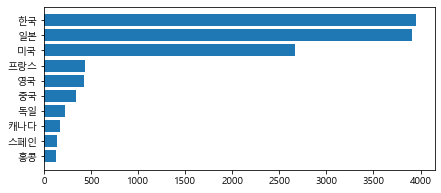

In [500]:
top10 = movie['국적'].value_counts().sort_values(ascending=True)[-10:].copy()
plt.figure(figsize=(7, 3))
plt.barh(top10.index, top10.values)
plt.show()

##### 6. 장르

- 장르 데이터
  - 결측치를 기타로 변경한 뒤이기 때문에 `KOBIS 장르 분포 통계` 기준과 같은 장르를 가진다.
  - count를 확인해본 결과 멜로/로맨스가 가장 높은 수치를 기록하였다.

In [501]:
len(movie['장르'].unique()), movie['장르'].unique()

(21,
 array(['사극', '코미디', '판타지', '드라마', '액션', '애니메이션', '어드벤처', 'SF', '범죄', '전쟁',
        '미스터리', '멜로/로맨스', '스릴러', '다큐멘터리', '공포(호러)', '뮤지컬', '가족', '공연',
        '기타', '서부극(웨스턴)', '성인물(에로)'], dtype=object))

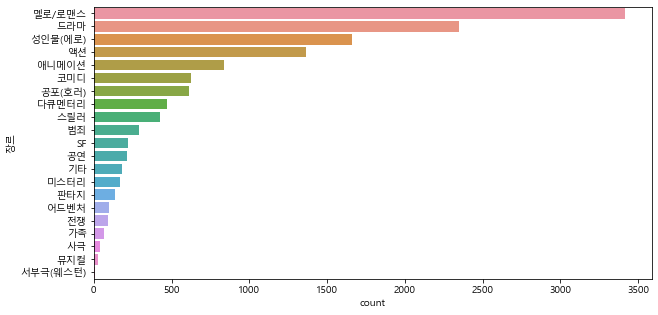

In [502]:
ordered_index = movie['장르'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(10, 5))
sns.countplot(data = movie, y = '장르', order=ordered_index)
plt.show()

##### 7. 등급

- 등급 데이터
  - 10개의 유형이 있고 복수의 데이터가 있는 경우를 확인하였다. 
  - 다수의 등급을 분리하여 1개의 대표등급으로 변경해준다.
    - 다수의 등급이 있는 경우 시청 연령이 작은 쪽을 선택해준다.

In [503]:
len(movie['등급'].unique()), movie['등급'].unique()

(10,
 array(['15세이상관람가', '12세이상관람가', '전체관람가', '청소년관람불가', '청소년관람불가,15세이상관람가',
        '15세관람가', '12세이상관람가,15세이상관람가', '12세이상관람가,전체관람가', '15세이상관람가,전체관람가',
        '15세관람가,12세이상관람가'], dtype=object))

In [504]:
# 다수의 등급 데이터 변경
for idx, row in movie.iterrows():
    if ',' in row['등급']:
        ratings = row['등급'].split(',')
        # 전체, 12, 15, 청소년관람불가 순
        if '전체' in ratings:
            movie['등급'][idx] = '전체관람가'
        elif '12' in ratings:
            movie['등급'][idx] = '12세관람가'
        elif '15' in ratings:
            movie['등급'][idx] = '15세관람가'
        else:
            movie['등급'][idx] = '청소년관람불가'
    else:
        movie['등급'][idx] = movie['등급'][idx].replace('이상', '')

- 총 4개의 유형으로 정리하였다.
  - 15세관람가, 12세관람가, 전체관람가, 청소년관람불가

In [505]:
len(movie['등급'].unique()), movie['등급'].unique()

(4, array(['15세관람가', '12세관람가', '전체관람가', '청소년관람불가'], dtype=object))

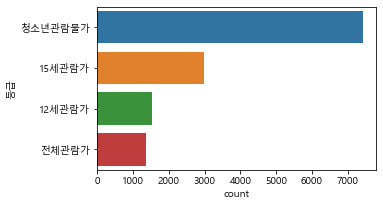

In [506]:
ordered_index = movie['등급'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(5, 3))
sns.countplot(data = movie, y = '등급', order=ordered_index)
plt.show()

##### 8. 영화구분

- 영화구분 데이터
  - 2개의 유형이 있고 일반영화가 2배 정도 더 많은 수치를 기록했다.

In [507]:
len(movie['영화구분'].unique()), movie['영화구분'].unique()

(2, array(['일반영화', '독립/예술영화'], dtype=object))

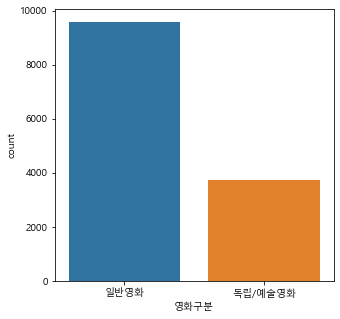

In [508]:
plt.figure(figsize=(5, 5))
sns.countplot(data = movie, x = '영화구분')
plt.show()

##### 9. 결과

In [509]:
category_cols = ['영화명','감독', '배급사','영화형태','국적','장르','등급','영화구분',]

# 범주형 데이터의 unique 확인
for col in category_cols:
    print('컬럼 [{}] UNIQUE : {}'.format(col, len(movie[col].unique())))

컬럼 [영화명] UNIQUE : 13116
컬럼 [감독] UNIQUE : 5987
컬럼 [배급사] UNIQUE : 606
컬럼 [영화형태] UNIQUE : 4
컬럼 [국적] UNIQUE : 68
컬럼 [장르] UNIQUE : 21
컬럼 [등급] UNIQUE : 4
컬럼 [영화구분] UNIQUE : 2


##### 데이터 임시 저장

In [510]:
# 데이터 임시 저장
# movie.to_excel('../data/전체영화데이터_2_category.xls', encoding='utf-8')

#### 영화 데이터 수치형 확인

- 데이터 유형
  - 날짜형(1개) : 개봉일('YYYY-MM-DD')
  - 수치형(3개) : 전국스크린수, 전국매출액, 전국관객수
  - 범주형(8개) : 영화명, 감독, 배급사, 영화형태, 국적, 장르, 등급, 영화구분

In [511]:
movie[['전국스크린수', '전국매출액', '전국관객수']].describe().astype('int64')

,전국스크린수,전국매출액,전국관객수
count,13308,13308,13308
mean,86,1141088085,143850
std,224,6475225188,808506
min,0,0,0
25%,1,6000,1
50%,2,300000,61
75%,34,34914520,4845
max,2835,139647979516,17613682


- 전국스크린수는 34개가 75% 지점이지만 최대값은 2835개인 만큼 불균형 현상이 있는 것을 볼 수 있다.

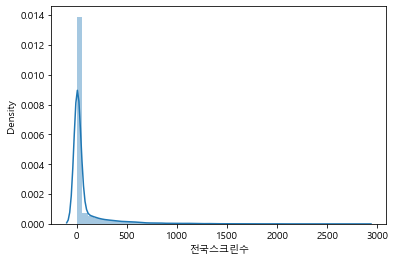

In [512]:
sns.distplot(movie['전국스크린수']);

- 매출액 또한 편향된 데이터를 가진 것을 볼 수 있다.

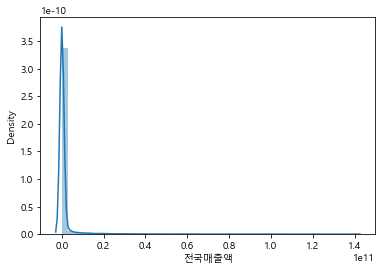

In [513]:
sns.distplot(movie['전국매출액']);

- 관객수 또한 편향된 데이터를 보이며 전체에 비해 소수의 영화만이 흥행에 성공한다는 것을 볼 수 있다.

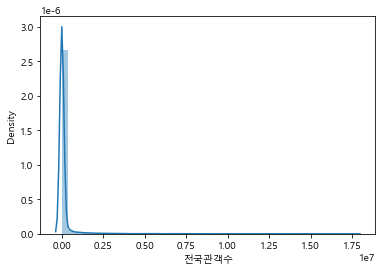

In [514]:
sns.distplot(movie['전국관객수']);

#### 영화 데이터 조절

- 수치형 데이터의 경우 불균형이 심하기 때문에 약간의 조절을 해준다.
  - 1,000 < 전국관객수 < 11,000,000
  - 전국스크린수 > 50
  - 총 데이터 2933개

In [515]:
movie[(movie['전국관객수'] > 1000) & (movie['전국스크린수'] > 50) & (movie['전국관객수'] < 11000000)].count()

영화명       2933
감독        2933
배급사       2933
개봉일       2933
영화형태      2933
국적        2933
전국스크린수    2933
전국매출액     2933
전국관객수     2933
장르        2933
등급        2933
영화구분      2933
dtype: int64

In [516]:
movie_resize = movie[(movie['전국관객수'] > 1000) & (movie['전국스크린수'] > 50) & (movie['전국관객수'] <= 11000000)]
movie_resize.head(3)

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국매출액,전국관객수,장르,등급,영화구분
순번,,,,,,,,,,,,
18,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니컴퍼니코리아 유한책임회사,2015-04-23,장편,미국,1843,88582586366,10494499,액션,12세관람가,일반영화
19,기생충,봉준호,(주)씨제이이엔엠,2019-05-30,장편,한국,1948,87459829095,10313086,드라마,15세관람가,일반영화
20,겨울왕국,제니퍼 리,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),2014-01-16,장편,미국,1010,82461504400,10296101,애니메이션,전체관람가,일반영화


In [517]:
movie_resize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2933 entries, 18 to 4697
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     2933 non-null   object        
 1   감독      2933 non-null   object        
 2   배급사     2933 non-null   object        
 3   개봉일     2933 non-null   datetime64[ns]
 4   영화형태    2933 non-null   object        
 5   국적      2933 non-null   object        
 6   전국스크린수  2933 non-null   int64         
 7   전국매출액   2933 non-null   int64         
 8   전국관객수   2933 non-null   int64         
 9   장르      2933 non-null   object        
 10  등급      2933 non-null   object        
 11  영화구분    2933 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 297.9+ KB


- 중복값 확인
  - 중복값의 수가 많았던 `감독`, `배급사` 컬럼만 확인

In [518]:
len(movie_resize['감독'].unique()), movie_resize['감독'].unique()[:10]

(1963,
 array(['조스 웨던', '봉준호', '제니퍼 리', '크리스토퍼 놀란', '브라이언 싱어', '이일형', '이상근',
        '한재림', '쉐인 블랙', '안소니 루소'], dtype=object))

In [519]:
len(movie_resize['배급사'].unique()), movie_resize['배급사'].unique()[:10]

(183,
 array(['월트디즈니컴퍼니코리아 유한책임회사', '(주)씨제이이엔엠', '소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)',
        '워너브러더스 코리아(주)', '(주)쇼박스', '월트디즈니컴퍼니코리아(주)', '롯데쇼핑㈜롯데엔터테인먼트',
        '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점', '이십세기폭스코리아(주)', '메가박스중앙(주)플러스엠'],
       dtype=object))

#### 각 컬럼별 영화 수 확인

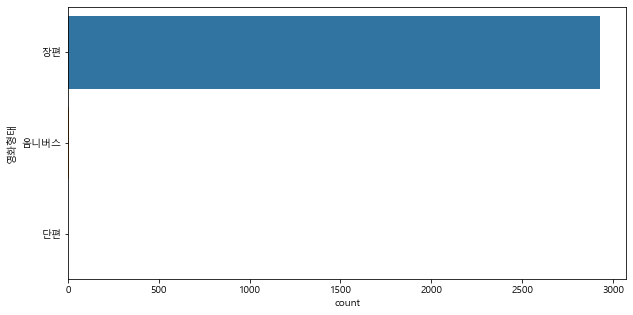

In [520]:
# 영화 형태
ordered_index = movie_resize['영화형태'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(10, 5))
sns.countplot(data = movie_resize, y = '영화형태', order=ordered_index)
plt.show()

In [521]:
movie_resize['영화형태'].value_counts()

장편      2927
옴니버스       5
단편         1
Name: 영화형태, dtype: int64

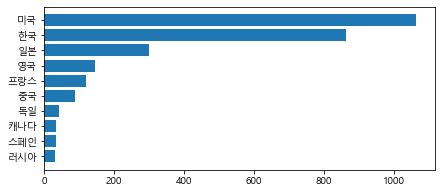

In [522]:
# 국가별 Top10
top10 = movie_resize['국적'].value_counts().sort_values(ascending=True)[-10:].copy()
plt.figure(figsize=(7, 3))
plt.barh(top10.index, top10.values)
plt.show()

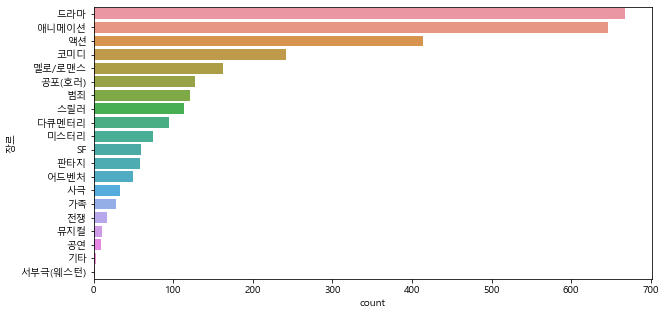

In [523]:
# 장르별 영화 수
ordered_index = movie_resize['장르'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(10, 5))
sns.countplot(data = movie_resize, y = '장르', order=ordered_index)
plt.show()

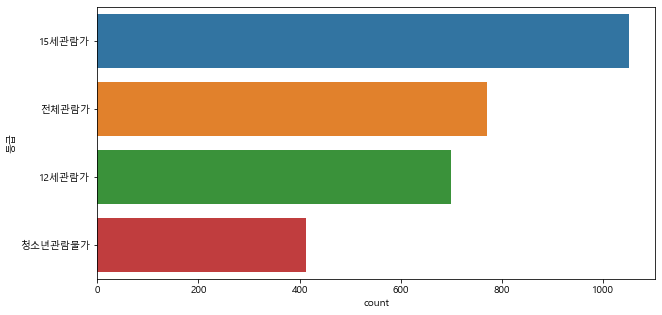

In [524]:
# 등급별 영화 수
ordered_index = movie_resize['등급'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(10, 5))
sns.countplot(data = movie_resize, y = '등급', order=ordered_index)
plt.show()

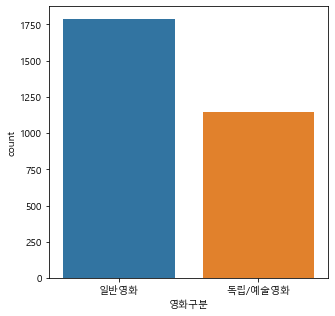

In [525]:
# 영화 구분
plt.figure(figsize=(5, 5))
sns.countplot(data = movie_resize, x = '영화구분')
plt.show()

#### 국가 컬럼 재확인

- 미국, 한국, 일본 순으로 많은 영화가 있는 것을 확인할 수 있다.

In [526]:
movie_resize['국적'].value_counts().sort_values(ascending=False)[:10]

미국     1064
한국      862
일본      300
영국      145
프랑스     119
중국       89
독일       43
스페인      34
캐나다      34
러시아      31
Name: 국적, dtype: int64

- 국적별 전국 관객수를 확인해본 결과 아래와 같다.
- 전국관객수의 최대값이 100만명을 넘어서는 프랑스(Top5)까지를 남겨두고 나머지 국적은 기타로 변경한다.

In [527]:
movie_resize[movie_resize['국적'] == '미국'].describe().astype('int64')

,전국스크린수,전국매출액,전국관객수
count,1064,1064,1064
mean,417,5622886360,692800
std,364,11452187503,1384789
min,51,9281500,1266
25%,159,215719925,28452
50%,307,948482100,123140
75%,561,4865531565,607980
max,2260,88582586366,10494499


In [528]:
movie_resize[movie_resize['국적'] == '한국'].describe().astype('int64')

,전국스크린수,전국매출액,전국관객수
count,862,862,862
mean,484,7763670626,993619
std,394,13314175409,1695429
min,51,9966880,1140
25%,157,181653817,23404
50%,398,1652871290,214941
75%,681,9332629625,1185702
max,2575,87459829095,10313086


In [529]:
movie_resize[movie_resize['국적'] == '일본'].describe().astype('int64')

,전국스크린수,전국매출액,전국관객수
count,300,300,300
mean,193,737881706,99589
std,149,1894738967,241819
min,51,11288000,1503
25%,81,80011337,10183
50%,136,216714285,28242
75%,262,830020864,114067
max,947,29248867156,3637122


In [530]:
movie_resize[movie_resize['국적'] == '영국'].describe().astype('int64')

,전국스크린수,전국매출액,전국관객수
count,145,145,145
mean,206,981590539,127642
std,174,2879508668,378367
min,51,12201850,1361
25%,92,102633800,13314
50%,153,210268100,27345
75%,263,497782500,69912
max,1105,24867023000,3375735


In [531]:
movie_resize[movie_resize['국적'] == '프랑스'].describe().astype('int64')

,전국스크린수,전국매출액,전국관객수
count,119,119,119
mean,180,626306484,82610
std,140,2053805692,272057
min,51,9564880,1211
25%,78,60753200,7491
50%,128,140161000,20056
75%,243,349692100,47360
max,682,17581098553,2308596


In [532]:
movie_resize[movie_resize['국적'] == '중국'].describe().astype('int64')

,전국스크린수,전국매출액,전국관객수
count,89,89,89
mean,192,243945732,33346
std,95,322959125,44773
min,54,20091000,2519
25%,126,69146700,9556
50%,178,120340400,16505
75%,239,291706400,40374
max,534,2211711500,315305


In [533]:
# 국적 데이터 변경
for idx, row in movie_resize.iterrows():
    if  row['국적'] not in ['미국', '한국', '일본', '영국', '프랑스']:
        movie_resize['국적'][idx] = '기타'

- 총 6개의 유형만 남은 것을 볼 수 있다.

In [534]:
movie_resize['국적'].value_counts()

미국     1064
한국      862
기타      443
일본      300
영국      145
프랑스     119
Name: 국적, dtype: int64

#### 수치형 데이터 상관관계 확인

- 수치형 데이터들 간의 상관관계 확인
  - 전국매출액과 전국 관객수는 1인 것을 확인할 수 있다.
  - 이는 매출액과 관객수 모두 `발권 데이터`를 기준으로하기 때문이다. 따라서 전국 매출액 컬럼은 삭제한다.
  - 전국스크린수와 전국관객수는 강한 상관관계가 있음을 볼 수 있다.

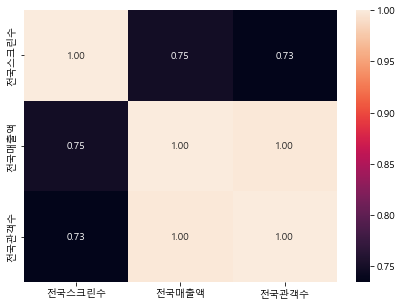

In [535]:
plt.figure(figsize=(7, 5))
sns.heatmap(data=movie_resize[['전국스크린수', '전국매출액', '전국관객수']].corr(), fmt='.2f', annot=True)
plt.show()

In [536]:
movie_resize.drop('전국매출액', axis=1, inplace=True) 

In [537]:
# 임시 저장
# movie_resize.to_excel('../data/전체영화데이터_3_resize.xls', encoding='utf-8')

#### 범주형 데이터 정리 1

- 범주형 데이터 중 `감독`, `배급사`, `배우`는 각 유형의 수가 많아 라벨화 또는 더미화가 힘들것이라 판단하였습니다.
- 영화 흥행 실적 여부를 변수로 새로 만들어 준다.
- **네이버 영화 데이터를 결합한 후 설정하기 위해 이후에 작업**

#### 범주형 데이터 정리 2

- 범주형 데이터 중 `영화형태`, `국적`, `장르`, `등급`, `영화구분`은 One-Hot Encoding을 이용해 변경해준다.

In [538]:
# One-Hot Encoding
movie_dummy = movie_resize.copy()
movie_labels = pd.get_dummies(movie_dummy,columns = ['영화형태','국적','장르','등급','영화구분'])
movie_labels.head(3)

,영화명,감독,배급사,개봉일,전국스크린수,전국관객수,영화형태_단편,영화형태_옴니버스,영화형태_장편,국적_기타,...,장르_어드벤처,장르_전쟁,장르_코미디,장르_판타지,등급_12세관람가,등급_15세관람가,등급_전체관람가,등급_청소년관람불가,영화구분_독립/예술영화,영화구분_일반영화
순번,,,,,,,,,,,,,,,,,,,,,
18,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니컴퍼니코리아 유한책임회사,2015-04-23,1843,10494499,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
19,기생충,봉준호,(주)씨제이이엔엠,2019-05-30,1948,10313086,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
20,겨울왕국,제니퍼 리,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),2014-01-16,1010,10296101,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [539]:
# from sklearn.preprocessing import LabelEncoder

In [540]:
# le_form = LabelEncoder()
# le_nation = LabelEncoder()
# le_genre = LabelEncoder()
# le_rating = LabelEncoder()
# le_class = LabelEncoder()

# movie_labels = movie_resize.copy()
# movie_labels['영화형태'] = le_form.fit_transform(movie_labels['영화형태'])
# movie_labels['국적'] = le_nation.fit_transform(movie_labels['국적'])
# movie_labels['장르'] = le_genre.fit_transform(movie_labels['장르'])
# movie_labels['등급'] = le_rating.fit_transform(movie_labels['등급'])
# movie_labels['영화구분'] = le_class.fit_transform(movie_labels['영화구분'])
# movie_labels.head(3)

In [541]:
# 임시 저장
# movie_labels.to_excel('../data/전체영화데이터_4_label.xls', encoding='utf-8')

### 2. 네이버 영화

#### 네이버 영화 데이터 결측치

- 2011 ~ 2020년 데이터를 크롤링하여 총 2414개의 데이터이며 결측치는 없다.

In [542]:
naver_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2414 entries, 0 to 2413
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   영화명     2414 non-null   object 
 1   감독      2414 non-null   object 
 2   주연배우    2414 non-null   object 
 3   평점      2414 non-null   float64
 4   평가자수    2414 non-null   int64  
 5   상영시간    2414 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 132.0+ KB


#### 네이버 영화 범주형 데이터

- 데이터 유형
  - 수치형(3개) : 평점, 평가자수, 상영시간
  - 범주형(3개) : 영화명, 감독, 주연배우
- 조금씩 중복이 있는 것을 확인할 수 있다.
- 영화명과 감독명을 합친 결과로는 중복값이 없으므로 해당값을 사용하여 `영화 데이터`와 결합한다.

In [543]:
category_cols = ['영화명','감독','주연배우', '영화+감독']
naver_test = naver_movie.copy()
naver_test['영화+감독'] = [row['영화명']+row['감독'] for idx, row in naver_test.iterrows()]
# 범주형 데이터의 unique 확인
for col in category_cols:
    print('컬럼 [{}] UNIQUE : {}'.format(col, len(naver_test[col].unique())))

컬럼 [영화명] UNIQUE : 2403
컬럼 [감독] UNIQUE : 1631
컬럼 [주연배우] UNIQUE : 2325
컬럼 [영화+감독] UNIQUE : 2414


##### 1. 주연배우

- naver_movie의 `주연배우` 컬럼의 값을 문자열로 되어있기 때문에 `literal_eval` 함수를 이용해 리스트형으로 만들어준다.
- 전체 배우의 중복 제거값을 확인해보면 총 4255명의 배우가 확인된다.

In [544]:
from ast import literal_eval

# literal_evel : 문자열 그대로 파이썬 명령을 실행시켜주는 함수
# 예시---------------------------------------
# 문자열 : "['문자열1', '문자열2', 22, '33']"
# 리스트 : ['문자열1', '문자열2', 22, '33']
actors = set( actor.strip() for i, row in naver_movie.iterrows() for actor in literal_eval(row['주연배우']))
actors.remove('')   # 공백 제거
actors = list(actors)

In [545]:
len(actors), actors[:5]

(4250, ['사사키 노조미', '황형근', '제레미 레니에', '정혜옥', '최재호'])

In [546]:
naver_movie.isnull().sum()

영화명     0
감독      0
주연배우    0
평점      0
평가자수    0
상영시간    0
dtype: int64

#### 결합

In [547]:
naver_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2414 entries, 0 to 2413
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   영화명     2414 non-null   object 
 1   감독      2414 non-null   object 
 2   주연배우    2414 non-null   object 
 3   평점      2414 non-null   float64
 4   평가자수    2414 non-null   int64  
 5   상영시간    2414 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 132.0+ KB


In [548]:
movie_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2933 entries, 18 to 4697
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   영화명           2933 non-null   object        
 1   감독            2933 non-null   object        
 2   배급사           2933 non-null   object        
 3   개봉일           2933 non-null   datetime64[ns]
 4   전국스크린수        2933 non-null   int64         
 5   전국관객수         2933 non-null   int64         
 6   영화형태_단편       2933 non-null   uint8         
 7   영화형태_옴니버스     2933 non-null   uint8         
 8   영화형태_장편       2933 non-null   uint8         
 9   국적_기타         2933 non-null   uint8         
 10  국적_미국         2933 non-null   uint8         
 11  국적_영국         2933 non-null   uint8         
 12  국적_일본         2933 non-null   uint8         
 13  국적_프랑스        2933 non-null   uint8         
 14  국적_한국         2933 non-null   uint8         
 15  장르_SF         2933 non-null   uint8  

In [549]:
movie_labels.shape, naver_movie.shape

((2933, 41), (2414, 6))

In [550]:
movie_merge = pd.merge(movie_labels, naver_movie, how='inner', on=['영화명', '감독'])

- Inner Join이므로 결측치는 확인되지 않는다.

In [551]:
movie_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2379 entries, 0 to 2378
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   영화명           2379 non-null   object        
 1   감독            2379 non-null   object        
 2   배급사           2379 non-null   object        
 3   개봉일           2379 non-null   datetime64[ns]
 4   전국스크린수        2379 non-null   int64         
 5   전국관객수         2379 non-null   int64         
 6   영화형태_단편       2379 non-null   uint8         
 7   영화형태_옴니버스     2379 non-null   uint8         
 8   영화형태_장편       2379 non-null   uint8         
 9   국적_기타         2379 non-null   uint8         
 10  국적_미국         2379 non-null   uint8         
 11  국적_영국         2379 non-null   uint8         
 12  국적_일본         2379 non-null   uint8         
 13  국적_프랑스        2379 non-null   uint8         
 14  국적_한국         2379 non-null   uint8         
 15  장르_SF         2379 non-null   uint8   

In [552]:
# 임시 저장
# movie_merge.to_excel('../data/전체영화데이터_5_merge.xls')

### 3. 통합 데이터

#### 범주형 데이터 확인

- 범주형 데이터 중 `감독`, `배급사`, `주연배우`는 각 유형의 수가 많아 더미 변수를 만들기 어렵다 판단하였습니다.
- 감독, 배급사, 주연배우의 영화 흥행 실적 여부를 변수로 새로 만들어 준다.
  - 흥행 실적 여부는 관객수 기준 역대 박스 오피스 Top 300 여부로 설정합니다.

In [553]:
# 전체 데이터 수, 감독수, 배급사 수, 주연배우 수
len(movie_merge), len(movie_merge['감독'].unique()), len(movie_merge['배급사'].unique()), len(movie_merge['주연배우'].unique())

(2379, 1617, 169, 2292)

In [554]:
movie_merge.columns

Index(['영화명', '감독', '배급사', '개봉일', '전국스크린수', '전국관객수', '영화형태_단편', '영화형태_옴니버스',
       '영화형태_장편', '국적_기타', '국적_미국', '국적_영국', '국적_일본', '국적_프랑스', '국적_한국',
       '장르_SF', '장르_가족', '장르_공연', '장르_공포(호러)', '장르_기타', '장르_다큐멘터리', '장르_드라마',
       '장르_멜로/로맨스', '장르_뮤지컬', '장르_미스터리', '장르_범죄', '장르_사극', '장르_서부극(웨스턴)',
       '장르_스릴러', '장르_애니메이션', '장르_액션', '장르_어드벤처', '장르_전쟁', '장르_코미디', '장르_판타지',
       '등급_12세관람가', '등급_15세관람가', '등급_전체관람가', '등급_청소년관람불가', '영화구분_독립/예술영화',
       '영화구분_일반영화', '주연배우', '평점', '평가자수', '상영시간'],
      dtype='object')

In [555]:
# 감독, 배급사의 흥행 여부 초기값 설정
movie_final = movie_merge.copy()
movie_final['감독_흥행'] = [0 for _ in range(len(movie_merge))]
movie_final['배급사_흥행'] = [0 for _ in range(len(movie_merge))]
movie_final['주연배우_흥행'] = [0 for _ in range(len(movie_merge))]

cols = ['감독', '배급사', '주연배우', '감독_흥행', '배급사_흥행', '주연배우_흥행']
movie_final[cols].head()

,감독,배급사,주연배우,감독_흥행,배급사_흥행,주연배우_흥행
0,조스 웨던,월트디즈니컴퍼니코리아 유한책임회사,"['로버트 다우니 주니어', ' 크리스 헴스워스', ' 마크 러팔로', ' 크리스 ...",0,0,0
1,봉준호,(주)씨제이이엔엠,"['송강호', ' 이선균', ' 조여정', ' 최우식', ' 박소담', ' 이정은'...",0,0,0
2,크리스토퍼 놀란,워너브러더스 코리아(주),"['마를린 맥코헨', ' 브라이언 랠리']",0,0,0
3,브라이언 싱어,월트디즈니컴퍼니코리아 유한책임회사,"['라미 말렉', ' 조셉 마젤로', ' 루시 보인턴', ' 벤 하디', ' 귈림 리']",0,0,0
4,이일형,(주)쇼박스,"['황정민', ' 강동원']",0,0,0


#### 감독 흥행 표시

- 개봉일 기준 이전 영화 중 박스 오피스 Top 300을 연출한 적이 있다면 `감독_흥행` 컬럼 생성

In [556]:
import datetime

In [557]:
for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y-%m-%d')
    director = row['감독'].strip()
    # Top300 중 개봉일 이전 영화의 감독 확인
    directors = ranking[(ranking['개봉일'] < open) & (ranking['감독'] == director)]
    # 해당 감독이 있다면 흥행 여부 표시
    if len(directors) > 0:
        score = directors.index[0]
        if score >= 271:
            score = 1
        elif score >= 241:
            score = 2
        elif score >= 211:
            score = 3
        elif score >= 181:
            score = 4
        elif score >= 151:
            score = 5
        elif score >= 121:
            score = 6
        elif score >= 91:
            score = 7
        elif score >= 61:
            score = 8
        elif score >= 31:
            score = 9
        else:
            score = 10    
        movie_final.loc[idx, '감독_흥행'] = score

- 총 242편의 영화의 감독이 흥행 실적이 있다.

In [558]:
(movie_final['감독_흥행'] == 0).value_counts()

True     2137
False     242
Name: 감독_흥행, dtype: int64

#### 배급사 흥행 표시

- 개봉일 기준 이전 영화 중 박스 오피스 Top 300 중 배급한 영화의 수

In [559]:
for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y-%m-%d')
    distributor = row['배급사'].strip()
    # Top300 중 개봉일 이전 영화의 배급사 확인
    distributors = ranking[(ranking['개봉일'] < open) & (ranking['배급사'] == distributor)]
    # 해당 배급사가 있다면 흥행 여부 표시
    if len(distributors) > 0:  
        movie_final.loc[idx, '배급사_흥행'] = len(distributors)

- 총 1013편의 영화의 배급사가 흥행 실적이 있다.

In [560]:
(movie_final['배급사_흥행'] == 0).value_counts()

True     1366
False    1013
Name: 배급사_흥행, dtype: int64

#### 배우 흥행 표시

- 해당 영화의 모든 배우에 대해 이전 영화 흥행 실적이 있는지 조사한다.
- **흥행 실적을 점수화해 평균, 합, 최대값 중 선택한다.**
  - 상관관계가 가장 높은 `합`을 사용한다.

In [561]:
# 배우의 경우 '["배우1", "배우2"]'와 같은 형태이므로 각 값을 뽑아낸다.
# literal_evel : 문자열 그대로 파이썬 명령을 실행시켜주는 함수
# 예시---------------------------------------
# 문자열 : "['문자열1', '문자열2', 22, '33']"
# 리스트 : ['문자열1', '문자열2', 22, '33']
from ast import literal_eval

In [562]:
for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y-%m-%d')
    # 해당 영화의 배우 확인
    this_actors = literal_eval(row['주연배우'])
    scores = [0] * len(this_actors)
    # 개봉일 이전 영화의 모든 배우 확인
    for i in range(len(this_actors)):
        actors = ranking.query(f'개봉일 < "{open}"')
        actors = actors.query(f'배우.str.contains("{this_actors[i]}")', engine='python')
        if len(actors) > 0:    
            score = actors.index[0]
            if score >= 271:
                score = 1
            elif score >= 241:
                score = 2
            elif score >= 211:
                score = 3
            elif score >= 181:
                score = 4
            elif score >= 151:
                score = 5
            elif score >= 121:
                score = 6
            elif score >= 91:
                score = 7
            elif score >= 61:
                score = 8
            elif score >= 31:
                score = 9
            else:
                score = 10 
            scores[i] = score   
    # 평균값
    # movie_final.loc[idx, '주연배우_흥행'] = round(sum(scores) / len(scores), 1)
    # 합
    movie_final.loc[idx, '주연배우_흥행'] = sum(scores)
    # 최대값
    # movie_final.loc[idx, '주연배우_흥행'] = max(scores)

- 배우의 흥행 실적이 있는 영화는 761개이다.

In [563]:
(movie_final['주연배우_흥행'] == 0).value_counts()

True     1618
False     761
Name: 주연배우_흥행, dtype: int64

In [564]:
movie_final[['영화명', '개봉일', '주연배우', '주연배우_흥행']].head()

,영화명,개봉일,주연배우,주연배우_흥행
0,어벤져스: 에이지 오브 울트론,2015-04-23,"['로버트 다우니 주니어', ' 크리스 헴스워스', ' 마크 러팔로', ' 크리스 ...",9
1,기생충,2019-05-30,"['송강호', ' 이선균', ' 조여정', ' 최우식', ' 박소담', ' 이정은'...",10
2,인터스텔라,2014-11-06,"['마를린 맥코헨', ' 브라이언 랠리']",0
3,보헤미안 랩소디,2018-10-31,"['라미 말렉', ' 조셉 마젤로', ' 루시 보인턴', ' 벤 하디', ' 귈림 리']",0
4,검사외전,2016-02-03,"['황정민', ' 강동원']",10


In [565]:
# 임시 저장
# movie_final.to_excel('../data/전체영화데이터_6_success.xls', encoding='utf-8')

### 4. 데이터 분리

- 2011년~2019년, 2020년 데이터로 분리

#### 2011년~2019년 데이터 분리

- 더미가 있는 테이블에서 2011~2019년의 데이터를 추출한다.
  - 2011년~2019년 : 2145개

In [566]:
movie_2011_2019 = movie_final.query('개봉일 < "2020-01-01"')
print(len(movie_2011_2019))
movie_2011_2019.head(3)

2145


,영화명,감독,배급사,개봉일,전국스크린수,전국관객수,영화형태_단편,영화형태_옴니버스,영화형태_장편,국적_기타,...,등급_청소년관람불가,영화구분_독립/예술영화,영화구분_일반영화,주연배우,평점,평가자수,상영시간,감독_흥행,배급사_흥행,주연배우_흥행
0,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니컴퍼니코리아 유한책임회사,2015-04-23,1843,10494499,0,0,1,0,...,0,0,1,"['로버트 다우니 주니어', ' 크리스 헴스워스', ' 마크 러팔로', ' 크리스 ...",8.32,31015,141,9,0,9
1,기생충,봉준호,(주)씨제이이엔엠,2019-05-30,1948,10313086,0,0,1,0,...,0,0,1,"['송강호', ' 이선균', ' 조여정', ' 최우식', ' 박소담', ' 이정은'...",8.48,37395,131,10,39,10
2,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아(주),2014-11-06,1342,10273803,0,0,1,0,...,0,0,1,"['마를린 맥코헨', ' 브라이언 랠리']",9.11,51135,83,8,13,0


In [567]:
# 임시저장
# movie_2011_2019.to_excel('../data/2011_2019영화데이터_final.xls', encoding='utf-8')

#### 2020년 데이터 분리

- 먼저 코로나 이전의 데이터로 학습시키기 위해 2020년 데이터를 분리한다.
  - 2020년 : 234개

In [568]:
movie_2020 = movie_final.query('개봉일 >= "20200101"')
print(len(movie_2020))
movie_2020.head(3)

234


,영화명,감독,배급사,개봉일,전국스크린수,전국관객수,영화형태_단편,영화형태_옴니버스,영화형태_장편,국적_기타,...,등급_청소년관람불가,영화구분_독립/예술영화,영화구분_일반영화,주연배우,평점,평가자수,상영시간,감독_흥행,배급사_흥행,주연배우_흥행
70,남산의 부장들,우민호,(주)쇼박스,2020-01-22,1659,4750104,0,0,1,0,...,0,0,1,"['이병헌', ' 이성민', ' 곽도원', ' 이희준', ' 김소진']",7.47,18168,114,9,40,10
83,다만 악에서 구하소서,홍원찬,(주)씨제이이엔엠,2020-08-05,1998,4352669,0,0,1,0,...,0,0,1,"['황정민', ' 이정재', ' 박정민', ' 박소이']",7.61,21397,108,0,42,10
99,반도,연상호,(주)넥스트엔터테인먼트월드(NEW),2020-07-15,2575,3812080,0,0,1,0,...,0,0,1,"['강동원', ' 이정현']",5.64,31323,116,10,19,10


In [569]:
# 임시 저장
# movie_2020.to_excel('../data/2020영화데이터_final.xls', encoding='utf-8')

---

## ◾데이터 분석

- 기본적으로 2011년~2019년 데이터를 분석하고 2020년 데이터는 추가로 확인한다.
- 2011년~2019년 데이터를 중점으로 진행하는 이유는 코로나19 이전의 데이터로 주요 컬럼을 선택하기 위함이다.
- 이후 2020년 데이터를 확인하여 코로나19의 영향이 있다 판단되면 모델 구현시 제외한다.

#### 수치형 데이터들의 상관관계 확인

In [570]:
movie_2011_2019.columns

Index(['영화명', '감독', '배급사', '개봉일', '전국스크린수', '전국관객수', '영화형태_단편', '영화형태_옴니버스',
       '영화형태_장편', '국적_기타', '국적_미국', '국적_영국', '국적_일본', '국적_프랑스', '국적_한국',
       '장르_SF', '장르_가족', '장르_공연', '장르_공포(호러)', '장르_기타', '장르_다큐멘터리', '장르_드라마',
       '장르_멜로/로맨스', '장르_뮤지컬', '장르_미스터리', '장르_범죄', '장르_사극', '장르_서부극(웨스턴)',
       '장르_스릴러', '장르_애니메이션', '장르_액션', '장르_어드벤처', '장르_전쟁', '장르_코미디', '장르_판타지',
       '등급_12세관람가', '등급_15세관람가', '등급_전체관람가', '등급_청소년관람불가', '영화구분_독립/예술영화',
       '영화구분_일반영화', '주연배우', '평점', '평가자수', '상영시간', '감독_흥행', '배급사_흥행',
       '주연배우_흥행'],
      dtype='object')

In [571]:
# 수치형 컬럼으로만 상관관계 확인
digital_cols2 = ['전국관객수', '전국스크린수', '평가자수', '평점', '상영시간',
                 '감독_흥행', '배급사_흥행','주연배우_흥행']

- 각 수치형 컬럼은 기본적으로 전국관객수와 상관관계를 가지고 있다.
- 각 수치형 컬럼은 전체적으로 불균형한 형태를 보이므로 Scaler를 사용해본다.
- 그 중 특히 값이 큰 전국스크린수, 평가자수 컬럼을 확인한다.

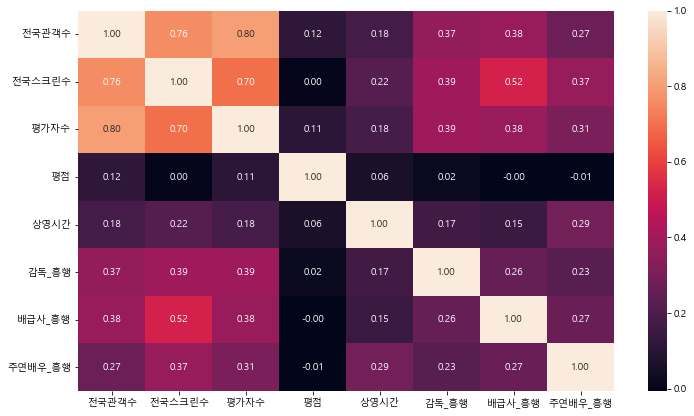

In [572]:
plt.figure(figsize=(12, 7))
sns.heatmap(movie_2011_2019[digital_cols2].corr(), annot=True, fmt='.2f')
plt.show()

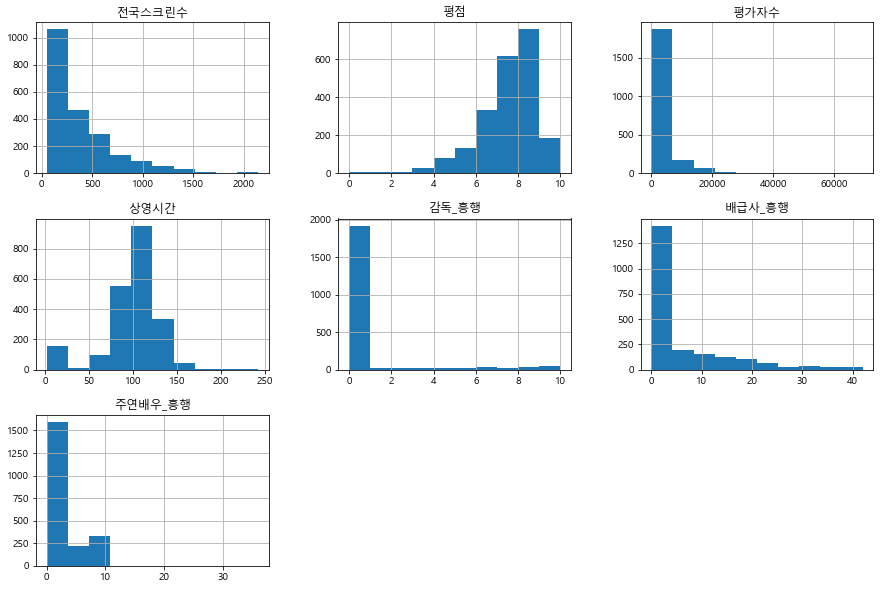

In [573]:
movie_2011_2019.hist(['전국스크린수', '평점', '평가자수', '상영시간','감독_흥행', '배급사_흥행', '주연배우_흥행'], figsize=(15, 10))
plt.show()

##### 1. 전국 스크린수

- 2011~2019년, 2020년 데이터에서 값의 차이가 심하지 않아 사용하기로 한다.

In [574]:
movie_2011_2019[['전국스크린수']].sort_values(by = '전국스크린수', ascending=False)[:5]

,전국스크린수
10,2142
30,2027
38,1972
18,1965
31,1957


In [575]:
movie_2011_2019[['전국스크린수']].describe()

,전국스크린수
count,2145.000000
mean,377.000000
std,339.324693
min,51.000000
25%,124.000000
50%,265.000000
75%,524.000000
max,2142.000000


In [576]:
movie_2020[['전국스크린수']].sort_values(by = '전국스크린수', ascending=False)[:5]

,전국스크린수
99,2575
229,2228
254,2137
83,1998
237,1882


In [577]:
movie_2020[['전국스크린수']].describe()

,전국스크린수
count,234.000000
mean,384.273504
std,444.270683
min,51.000000
25%,105.000000
50%,196.000000
75%,464.500000
max,2575.000000


##### 2. 평가자수

- 2011~2019년, 2020년 데이터에서 값의 차이가 심하다.
- 코로나의 영향으로 관객수가 줄어든 것이 영향을 미친 것으로 판단하여 예측시에 제외한다.

In [578]:
movie_2011_2019[['평가자수']].sort_values(by = '평가자수', ascending=False)[:5]

,평가자수
22,69234
30,53590
143,51611
2,51135
103,50563


In [579]:
movie_2011_2019[['평가자수']].describe()

,평가자수
count,2145.000000
mean,3076.002331
std,5773.756307
min,0.000000
25%,238.000000
50%,907.000000
75%,3277.000000
max,69234.000000


In [580]:
movie_2020[['평가자수']].sort_values(by = '평가자수',ascending=False)[:5]

,평가자수
99,31323
83,21397
237,18648
70,18168
254,18049


In [581]:
movie_2020[['평가자수']].describe()

,평가자수
count,234.000000
mean,1407.927350
std,3582.208541
min,4.000000
25%,96.500000
50%,208.500000
75%,748.750000
max,31323.000000


#### 훈련용, 테스트용 데이터 분리

In [582]:
from sklearn.model_selection import train_test_split

- 각 컬럼의 확인을 마쳤으니 2011년~2019년 데이터를 훈련용, 테스트용으로 분리한다.

- X : ['영화명', '감독', '주연배우', '배급사', '평가자수' '개봉일', '전국관객수'] 제외 컬럼
  - 평가는 영화를 본 사람들이 많이 참여하므로 코로나 영향을 받는다 판단하여 제외하였습니다.
- y : ['전국관객수'] 컬럼
  - 값이 크기 때문에 '전국관객수 / 1000'을 사용한다.

In [583]:
not_used = ['영화명', '감독', '배급사', '주연배우', '평가자수', '개봉일', '전국관객수']
X = movie_2011_2019.drop(not_used, axis=1)
y = movie_2011_2019['전국관객수'] / 1000

X.shape, y.shape

((2145, 41), (2145,))

- sklearn의 `train_test_split`을 사용하여 분리한다.
  - `2011년~2019년`의 20%를 테스트용으로 사용한다.
  - train : 1716개
  - test : 429개

In [584]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [585]:
X_train.shape, y_train.shape

((1716, 41), (1716,))

In [586]:
X_test.shape, y_test.shape

((429, 41), (429,))

---

## ◾모델 구현1
- 스케일 미적용

In [587]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

### 1. 모델 수립 및 예측

#### 선형 회귀 모델

- 선형 회귀 모델 학습

In [588]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

LinearRegression()

- 예측 및 모델 평가
  - 모델 평가는 RMSE(Root Mean Square Error)을 사용한다.

In [589]:
pred_tr = lr_clf.predict(X_train)
pred_test = lr_clf.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : {}'.format(rmse_tr))
print('RMSE of Test Data : {}'.format(rmse_test))

RMSE of Train Data : 854.4325900648541
RMSE of Test Data : 948.178688629343


- 성능 평가(참값, 예측값 비교)

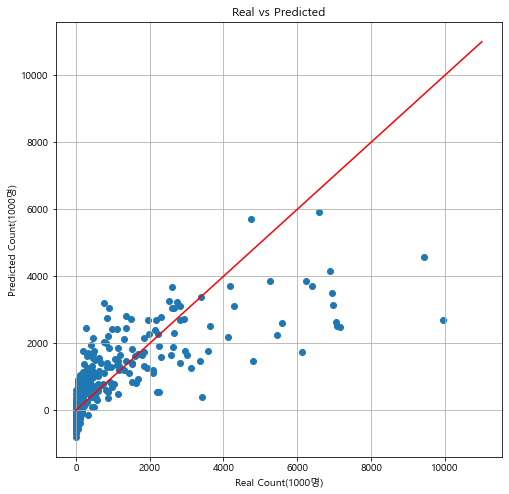

In [590]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred_test)
plt.xlabel('Real Count(1000명)')
plt.ylabel('Predicted Count(1000명)')
plt.grid(True)
plt.title('Real vs Predicted')
plt.plot([0, 11000], [0, 11000], 'r')
plt.show()

#### 랜덤포레스트 회귀 모델

- GridSearch를 이용해 최고의 모델을 뽑아 비교한다.

In [591]:
params = {
    'max_depth' : [2, 4, 6, 8],           # depth 설정
    'n_estimators' : [50, 100, 200],    # tree의 개수
    'min_samples_leaf' : [8, 12],       # 각 결과 데이터의 최소 개수
    'min_samples_split' : [8, 12]       # 분할의 최소 개수
}
rf_clf = RandomForestRegressor(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [592]:
grid_cv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 200}

In [593]:
best_rf_clf = grid_cv.best_estimator_

pred_tr = best_rf_clf.predict(X_train)
pred_test = best_rf_clf.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : {}'.format(rmse_tr))
print('RMSE of Train Data : {}'.format(rmse_test))

RMSE of Train Data : 651.0881194565059
RMSE of Train Data : 814.2576467799918


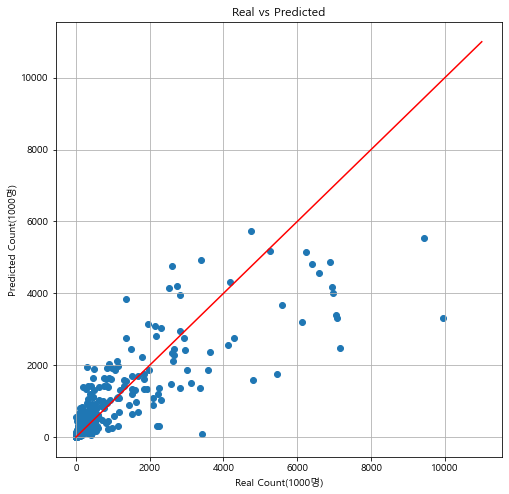

In [594]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred_test)
plt.xlabel('Real Count(1000명)')
plt.ylabel('Predicted Count(1000명)')
plt.grid(True)
plt.title('Real vs Predicted')
plt.plot([0, 11000], [0, 11000], 'r')
plt.show()

#### GBM 회귀

In [595]:
params = {
    'n_estimators' : [25, 50, 100, 150], 
    'learning_rate' : [0.08, 0.1, 0.12],
}

gb_clf = GradientBoostingRegressor(random_state=13)
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=13),
             n_jobs=-1,
             param_grid={'learning_rate': [0.08, 0.1, 0.12],
                         'n_estimators': [25, 50, 100, 150]})

In [596]:
grid_cv.best_params_

{'learning_rate': 0.08, 'n_estimators': 50}

In [597]:
best_gb_clf = grid_cv.best_estimator_

pred_tr = best_gb_clf.predict(X_train)
pred_test = best_gb_clf.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : {}'.format(rmse_tr))
print('RMSE of Test Data : {}'.format(rmse_test))

RMSE of Train Data : 643.3518769983194
RMSE of Test Data : 857.9429803038366


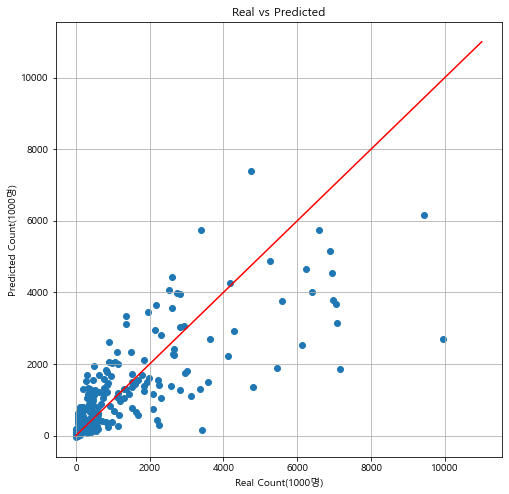

In [598]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred_test)
plt.xlabel('Real Count(1000명)')
plt.ylabel('Predicted Count(1000명)')
plt.grid(True)
plt.title('Real vs Predicted')
plt.plot([0, 11000], [0, 11000], 'r')
plt.show()

#### 전체 결과

In [599]:
# DataFrame 결과 반환
import numpy as np

def result_pd(clfs, clf_names, X_train, X_test, y_train, y_test):
    train_results = []
    test_results = []
    pred_test_list = []
    for clf in clfs:
        clf.fit(X_train, y_train)
        pred_train = clf.predict(X_train)
        pred_test = clf.predict(X_test)

        rmse_train = round((np.sqrt(mean_squared_error(y_train, pred_train))),1 )
        rmse_test = round((np.sqrt(mean_squared_error(y_test, pred_test))),1 )

        train_results.append(rmse_train)
        test_results.append(rmse_test)
        pred_test_list.append(pred_test)
    
    result_df = pd.DataFrame({
        'Train RMSE' : train_results,
        'Test RMSE' : test_results,
    }, index=clf_names)

    return result_df, pred_test_list

In [600]:
clfs = [lr_clf, best_rf_clf, best_gb_clf]
clf_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
results, [pred_lr, pred_rf, pred_gb] = result_pd(clfs, clf_names, X_train, X_test, y_train, y_test)
results

,Train RMSE,Test RMSE
Linear Regression,854.4,948.2
Random Forest,651.1,814.3
Gradient Boosting,643.4,857.9


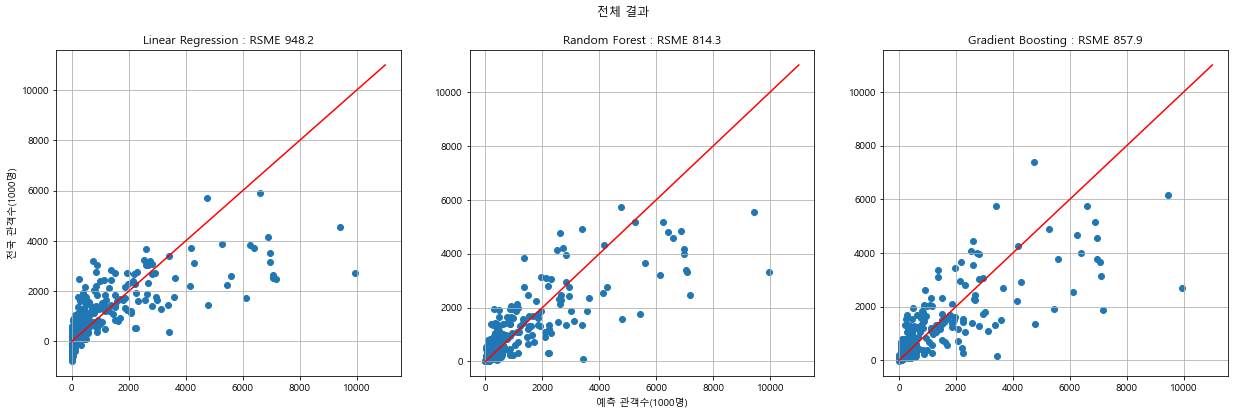

In [601]:
fig,ax=plt.subplots(1,3, figsize=(21, 6))

fig.suptitle('전체 결과')

ax[0].scatter(y_test, pred_lr)
ax[0].set_title(f"Linear Regression : RSME {results.loc['Linear Regression', 'Test RMSE']}")
ax[0].set_ylabel('전국 관객수(1000명)')
ax[0].grid(True)
ax[0].plot([0, 11000], [0, 11000], 'r')

ax[1].scatter(y_test, pred_rf)
ax[1].set_title(f"Random Forest : RSME {results.loc['Random Forest', 'Test RMSE']}")
ax[1].set_xlabel('예측 관객수(1000명)')
ax[1].grid(True)
ax[1].plot([0, 11000], [0, 11000], 'r')

ax[2].scatter(y_test, pred_gb)
ax[2].set_title(f"Gradient Boosting : RSME {results.loc['Gradient Boosting', 'Test RMSE']}")
ax[2].grid(True)
ax[2].plot([0, 11000], [0, 11000], 'r')

plt.show()

### 2. 2020년 데이터 적용

#### 2020년 데이터 예측

- 3개의 모델을 비교해 높은 성능을 선택한다.

In [602]:
# 변수, 라벨 분리
X_2020 = movie_2020.drop(not_used, axis=1)
y_2020 = movie_2020['전국관객수'] / 1000

X_2020.shape, y_2020.shape

((234, 41), (234,))

- 모델 예측 및 평가

In [603]:
pred_2020 = best_rf_clf.predict(X_2020)
rmse_2020 = (np.sqrt(mean_squared_error(y_2020, pred_2020)))

print('RMSE of 2020 Data : {}'.format(rmse_2020))

RMSE of 2020 Data : 892.329086692507


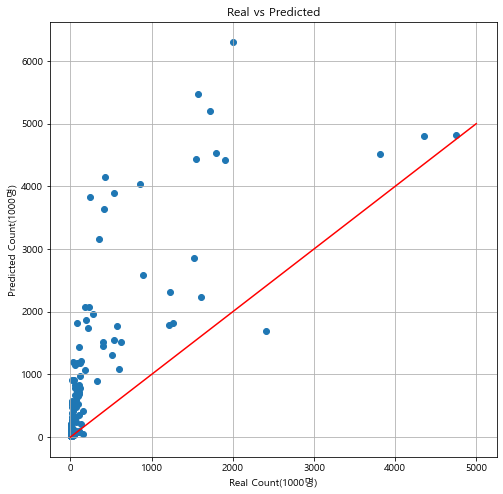

In [604]:
plt.figure(figsize=(8, 8))
plt.scatter(y_2020, pred_2020)
plt.xlabel('Real Count(1000명)')
plt.ylabel('Predicted Count(1000명)')
plt.title('Real vs Predicted')
plt.grid(True)
plt.plot([0, 5000], [0, 5000], 'r')
plt.show()

#### 실제값과 예측값 비교

- 예측 결과를 `movie_2020`에 추가하여 비교해본다.

In [605]:
movie_predict = movie_2020[['영화명','감독','개봉일','전국관객수']]
# 1000으로 나눈 예측값이므로 다시 곱해준다.
movie_predict['예측관객수'] = (pred_2020 * 1000).astype('int')
movie_predict['diff'] = movie_predict['예측관객수']-movie_predict['전국관객수']

In [606]:
movie_predict.sort_values('diff', ascending=False).head()

,영화명,감독,개봉일,전국관객수,예측관객수,diff
229,테넷,크리스토퍼 놀란,2020-08-26,1998987,6307343,4308356
295,삼진그룹 영어토익반,이종필,2020-10-21,1571774,5469219,3897445
634,이웃사촌,이환경,2020-11-25,431559,4148138,3716579
809,뮬란,니키 카로,2020-09-17,236247,3838175,3601928
267,담보,강대규,2020-09-29,1719592,5197655,3478063


In [607]:
movie_predict['전국관객수'].mean()

199249.60256410256

In [608]:
movie_predict['예측관객수'].mean()

603750.2051282051

In [609]:
movie_predict['diff'].mean()

404500.60256410256

- 전국 관객수와 예측 관객수 히스토그램

In [610]:
fig = px.histogram(movie_predict, x='전국관객수')
fig.show()

In [611]:
fig = px.histogram(movie_predict, x='예측관객수')
fig.show()

---

## ◾모델 구현2
- Standard Scaler

In [612]:
X_train.columns

Index(['전국스크린수', '영화형태_단편', '영화형태_옴니버스', '영화형태_장편', '국적_기타', '국적_미국', '국적_영국',
       '국적_일본', '국적_프랑스', '국적_한국', '장르_SF', '장르_가족', '장르_공연', '장르_공포(호러)',
       '장르_기타', '장르_다큐멘터리', '장르_드라마', '장르_멜로/로맨스', '장르_뮤지컬', '장르_미스터리',
       '장르_범죄', '장르_사극', '장르_서부극(웨스턴)', '장르_스릴러', '장르_애니메이션', '장르_액션',
       '장르_어드벤처', '장르_전쟁', '장르_코미디', '장르_판타지', '등급_12세관람가', '등급_15세관람가',
       '등급_전체관람가', '등급_청소년관람불가', '영화구분_독립/예술영화', '영화구분_일반영화', '평점', '상영시간',
       '감독_흥행', '배급사_흥행', '주연배우_흥행'],
      dtype='object')

In [613]:
ss = StandardScaler()

In [614]:
X_train_ss = X_train.copy()
X_test_ss = X_test.copy()

ss_cols = ['전국스크린수', '평점', '상영시간', '감독_흥행', '배급사_흥행', '주연배우_흥행']

X_train_ss[ss_cols] = ss.fit_transform(X_train[ss_cols])
X_test_ss[ss_cols] = ss.fit_transform(X_test[ss_cols])

### 1. 모델 수립 및 예측

#### 선형 회귀 모델

- 선형 회귀 모델 학습

In [615]:
lr_clf = LinearRegression()
lr_clf.fit(X_train_ss, y_train)

LinearRegression()

- 예측 및 모델 평가
  - 모델 평가는 RMSE(Root Mean Square Error)을 사용한다.

In [616]:
pred_tr = lr_clf.predict(X_train_ss)
pred_test = lr_clf.predict(X_test_ss)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : {}'.format(rmse_tr))
print('RMSE of Test Data : {}'.format(rmse_test))

RMSE of Train Data : 854.4325900648541
RMSE of Test Data : 946.8134316072397


- 성능 평가(참값, 예측값 비교)

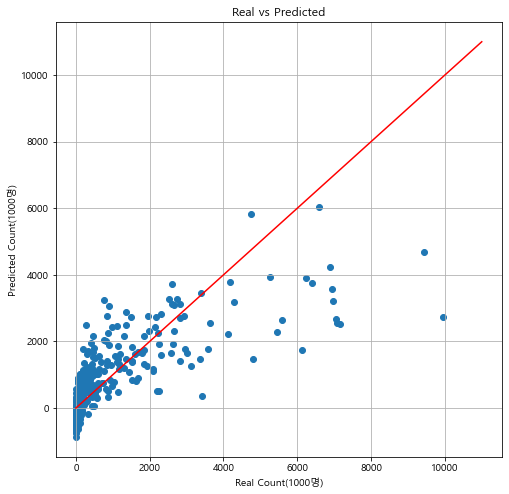

In [617]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred_test)
plt.xlabel('Real Count(1000명)')
plt.ylabel('Predicted Count(1000명)')
plt.grid(True)
plt.title('Real vs Predicted')
plt.plot([0, 11000], [0, 11000], 'r')
plt.show()

#### 랜덤포레스트 회귀 모델

- GridSearch를 이용해 최고의 모델을 뽑아 비교한다.

In [618]:
params = {
    'max_depth' : [2, 4, 8],           # depth 설정
    'n_estimators' : [50, 100, 200],    # tree의 개수
    'min_samples_leaf' : [8, 12],       # 각 결과 데이터의 최소 개수
    'min_samples_split' : [8, 12]       # 분할의 최소 개수
}
rf_clf = RandomForestRegressor(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train_ss, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [619]:
grid_cv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 200}

In [620]:
best_rf_clf = grid_cv.best_estimator_

pred_tr = best_rf_clf.predict(X_train_ss)
pred_test = best_rf_clf.predict(X_test_ss)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : {}'.format(rmse_tr))
print('RMSE of Test Data : {}'.format(rmse_test))

RMSE of Train Data : 651.2508142530651
RMSE of Test Data : 812.5885202895471


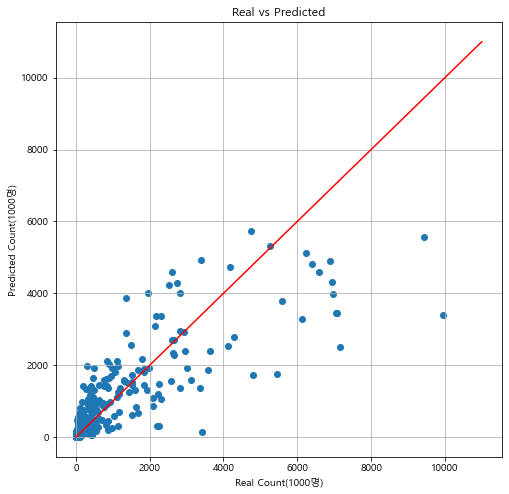

In [621]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred_test)
plt.xlabel('Real Count(1000명)')
plt.ylabel('Predicted Count(1000명)')
plt.grid(True)
plt.title('Real vs Predicted')
plt.plot([0, 11000], [0, 11000], 'r')
plt.show()

#### GBM 회귀

In [622]:
params = {
    'n_estimators' : [50, 100, 200], 
    'learning_rate' : [0.08, 0.1, 0.12],
}

gb_clf = GradientBoostingRegressor(random_state=13)
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train_ss, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=13),
             n_jobs=-1,
             param_grid={'learning_rate': [0.08, 0.1, 0.12],
                         'n_estimators': [50, 100, 200]})

In [623]:
grid_cv.best_params_

{'learning_rate': 0.08, 'n_estimators': 50}

In [624]:
best_gb_clf = grid_cv.best_estimator_

pred_tr = best_gb_clf.predict(X_train_ss)
pred_test = best_gb_clf.predict(X_test_ss)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : {}'.format(rmse_tr))
print('RMSE of Test Data : {}'.format(rmse_test))

RMSE of Train Data : 643.3518769983194
RMSE of Test Data : 842.8098430892501


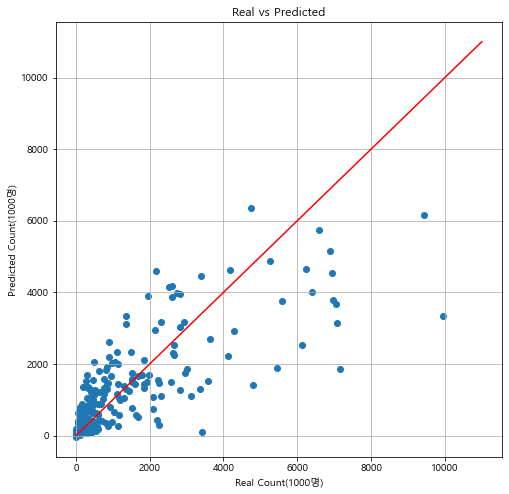

In [625]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred_test)
plt.xlabel('Real Count(1000명)')
plt.ylabel('Predicted Count(1000명)')
plt.grid(True)
plt.title('Real vs Predicted')
plt.plot([0, 11000], [0, 11000], 'r')
plt.show()

#### 전체 결과

In [626]:
clfs = [lr_clf, best_rf_clf, best_gb_clf]
clf_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
results, [pred_lr, pred_rf, pred_gb] = result_pd(clfs, clf_names, X_train_ss, X_test_ss, y_train, y_test)
results

,Train RMSE,Test RMSE
Linear Regression,854.4,946.8
Random Forest,651.3,812.6
Gradient Boosting,643.4,842.8


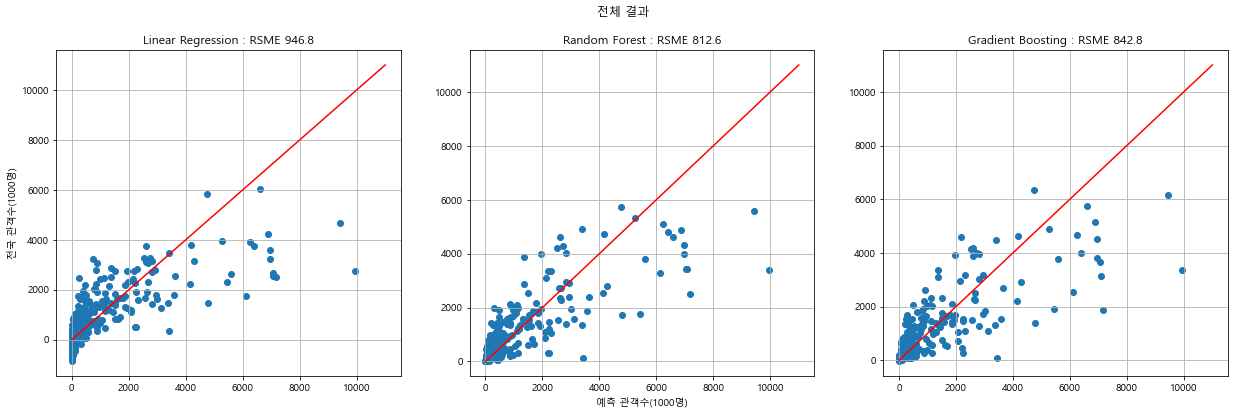

In [627]:
fig,ax=plt.subplots(1,3, figsize=(21, 6))

fig.suptitle('전체 결과')

ax[0].scatter(y_test, pred_lr)
ax[0].set_title(f"Linear Regression : RSME {results.loc['Linear Regression', 'Test RMSE']}")
ax[0].set_ylabel('전국 관객수(1000명)')
ax[0].grid(True)
ax[0].plot([0, 11000], [0, 11000], 'r')

ax[1].scatter(y_test, pred_rf)
ax[1].set_title(f"Random Forest : RSME {results.loc['Random Forest', 'Test RMSE']}")
ax[1].set_xlabel('예측 관객수(1000명)')
ax[1].grid(True)
ax[1].plot([0, 11000], [0, 11000], 'r')

ax[2].scatter(y_test, pred_gb)
ax[2].set_title(f"Gradient Boosting : RSME {results.loc['Gradient Boosting', 'Test RMSE']}")
ax[2].grid(True)
ax[2].plot([0, 11000], [0, 11000], 'r')

plt.show()

### 2. 2020년 데이터 적용

#### 2020년 데이터 예측

- 3개의 모델을 비교했을 때 랜덤 포레스트 회귀 모델이 높은 성능을 냈다.

In [628]:
# 변수, 라벨 분리
X_2020 = movie_2020.drop(not_used, axis=1)
y_2020 = movie_2020['전국관객수'] / 1000

X_2020.shape, y_2020.shape

((234, 41), (234,))

In [629]:
X_2020_ss = X_2020.copy()
X_2020_ss[ss_cols] = ss.fit_transform(X_2020[ss_cols])

- 모델 예측 및 평가
  - 가장 잘 예측한 GBM 회귀 모델을 사용해서 예측한다.

In [630]:
pred_2020 = best_rf_clf.predict(X_2020_ss)
rmse_2020 = (np.sqrt(mean_squared_error(y_2020, pred_2020)))

print('RMSE of 2020 Data : {}'.format(rmse_2020))

RMSE of 2020 Data : 716.4146786077531


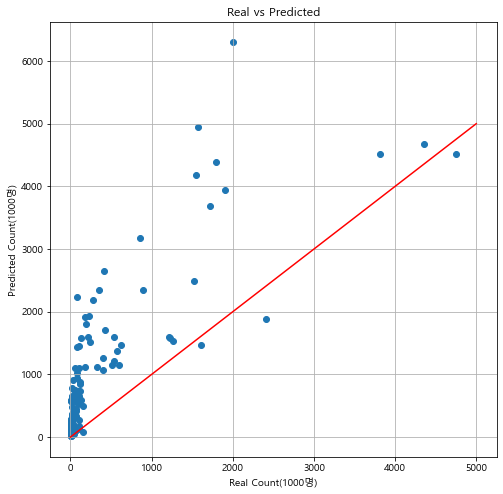

In [631]:
plt.figure(figsize=(8, 8))
plt.scatter(y_2020, pred_2020)
plt.xlabel('Real Count(1000명)')
plt.ylabel('Predicted Count(1000명)')
plt.title('Real vs Predicted')
plt.grid(True)
plt.plot([0, 5000], [0, 5000], 'r')
plt.show()

#### 실제값과 예측값 비교

- 예측 결과를 `movie_2020`에 추가하여 비교해본다.

In [632]:
movie_predict = movie_2020[['영화명','감독','개봉일','전국관객수']]
# 1000으로 나눈 예측값이므로 다시 곱해준다.
movie_predict['예측관객수'] = (pred_2020 * 1000).astype('int')
movie_predict['diff'] = movie_predict['예측관객수']-movie_predict['전국관객수']

In [633]:
movie_predict.sort_values('예측관객수', ascending=False).head(10)

,영화명,감독,개봉일,전국관객수,예측관객수,diff
229,테넷,크리스토퍼 놀란,2020-08-26,1998987,6307343,4308356
295,삼진그룹 영어토익반,이종필,2020-10-21,1571774,4945090,3373316
83,다만 악에서 구하소서,홍원찬,2020-08-05,4352669,4682867,330198
99,반도,연상호,2020-07-15,3812080,4516461,704381
70,남산의 부장들,우민호,2020-01-22,4750104,4509524,-240580
254,강철비2: 정상회담,양우석,2020-07-29,1790797,4384579,2593782
300,도굴,박정배,2020-11-04,1543813,4177462,2633649
237,#살아있다,조일형,2020-06-24,1903703,3934443,2030740
267,담보,강대규,2020-09-29,1719592,3687853,1968261
454,작은 아씨들,그레타 거윅,2020-02-12,859072,3172867,2313795


In [634]:
movie_predict['전국관객수'].mean()

199249.60256410256

In [635]:
movie_predict['예측관객수'].mean()

569805.6794871795

In [636]:
movie_predict['diff'].mean()

370556.07692307694

In [637]:
movie_predict[['전국관객수', '예측관객수', 'diff']].describe().astype('int64')

,전국관객수,예측관객수,diff
count,234,234,234
mean,199249,569805,370556
std,606490,1002373,614452
min,1140,23243,-520430
25%,4817,50617,40762
50%,15220,135770,113482
75%,72769,589181,461010
max,4750104,6307343,4308356


In [638]:
movie_2011_2019[['전국관객수']].describe().astype('int64')

,전국관객수
count,2145
mean,672788
std,1395798
min,1303
25%,19846
50%,89358
75%,560620
max,10494499


- 전국 관객수와 예측 관객수 히스토그램

In [639]:
fig = px.histogram(movie_predict, x='전국관객수')
fig.show()

In [640]:
fig = px.histogram(movie_predict, x='예측관객수')
fig.show()

---

## ◾결과

1. StandardScaler를 적용한 결과가 약간이지만 성능의 향상을 이끌어냈다.
2. 전국관객수와 예측관객수의 차이가 초기에 예상한 것처럼 크게 보이지는 않았지만 더 많은 관객을 끌어들일 수 있었음을 보였다.